___
# PROJETO 1

## Bruno Dratcu
___

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


UF = unidade de federação 

V0202 = tipo do domicilio (2 = casa, 4 = apartamento, 6 = comodo)
V0205 = numero de comodos do domicilio
V4620 = numero de componentes do domicilio

V0207 = condição de ocupação do domicilio (1=proprio-ja pago, 2=proprio-ainda pagando, 3=alugado, 4=cedido por empregador, 5=cedido de outra forma, 6=outra condição)
V4621 = rendimento mensal domiciliar per capita

V02322 = tem acesso a internet no proprio domicilio (2 = sim, 4 = nao)

V0215 = tem banheiro no domicilio (1=sim, 3=nao)
V2016 = numero de banheiros 
V0217 = forma de escoadouro do banheiro
V0212 = proveniencia da agua canalizada (2=rede de distribuição, 4=poço ou nascente, 6=outros)





___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [46]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruno Dratcu\Desktop\2o DP\CD\CD1S17\Projeto1


In [47]:
dados2015=pd.read_csv('DOM2015.csv',sep=',')

In [48]:
dados2011=pd.read_csv('DOM2011.csv',sep=',')

In [49]:
dados2015.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4611,V4614,UPA,V4617,V4618,V4620,V4621,V4622,V4624,V9992
0,0,2015,11,15,1,1,1.0,1.0,1.0,4.0,...,270.0,800.0,191,110001,1,1.0,800.0,4.0,1.0,20161104
1,1,2015,11,15,2,6,NaN,NaN,NaN,NaN,...,NaN,NaN,191,110001,1,NaN,NaN,NaN,NaN,20161104
2,2,2015,11,15,3,1,1.0,1.0,1.0,4.0,...,270.0,1150.0,191,110001,1,1.0,1150.0,4.0,1.0,20161104
3,3,2015,11,15,4,1,6.0,4.0,1.0,2.0,...,270.0,4760.0,191,110001,1,6.0,793.0,4.0,2.0,20161104
4,4,2015,11,15,5,1,2.0,2.0,1.0,2.0,...,271.0,5800.0,191,110001,1,2.0,2900.0,6.0,2.0,20161104


In [50]:
dados2011.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4611,V4614,UPA,V4617,V4618,V4620,V4621,V4622,V4624,V9992
0,0,2011,11,15,1,1,4.0,3.0,1.0,2.0,...,235.0,1.000000e+12,191,110001,1,4.0,1.000000e+12,99.0,2.0,20120918
1,1,2011,11,15,2,1,4.0,4.0,1.0,2.0,...,235.0,5.845000e+03,191,110001,1,4.0,1.461000e+03,5.0,1.0,20120918
2,2,2011,11,15,3,3,NaN,NaN,NaN,NaN,...,NaN,NaN,191,110001,1,NaN,NaN,NaN,NaN,20120918
3,3,2011,11,15,4,1,2.0,2.0,1.0,2.0,...,235.0,1.000000e+12,191,110001,1,2.0,1.000000e+12,99.0,1.0,20120918
4,4,2011,11,15,5,1,6.0,5.0,1.0,2.0,...,235.0,6.000000e+03,191,110001,1,6.0,1.000000e+03,4.0,2.0,20120918


In [148]:
dados = dados2015.loc[:,["UF","V0202", "V0203", "V0204", "V0205",
                          "V0207","V4621","V2015",
                          "V0216"]] #,"V0217","V0212"]]

In [149]:
dados = pd.DataFrame()

dados["Regiões"] = dados2015.UF
dados["Domicílio"] = dados2015.V0202
dados["Material predominante das paredes do domicílio"] = dados2015.V0203
dados["Material predominante na cobertura do domicílio"] = dados2015.V0204
dados["Quantidade de Cômodos"] = dados2015.V0205
dados["Condição de ocupação"] = dados2015.V0207
dados["Rendimento mensal"] = dados2015.V4621
dados["Banheiro/sanitário?"] = dados2015.V0215
dados["Quantidade de banheiros"] = dados2015.V2016


#dados["Forma de escoamento"] = dados2015.V0217
#dados["Proveniência da água canalizada"] = dados2015.V0212

#dados

In [150]:
dados["Regiões"] = dados["Regiões"].astype('category')
dados["Regiões"].cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
                                   'Amapá', 'Tocantins', 'Maranhão','Piauí', 'Ceará',
                                   'Rio Grande do Norte','Paraíba', 'Pernambuco', 'Alagoas', 
                                   'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 
                                   'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 
                                   'Rio Grande do Sul','Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 
                                   'Distrito Federal')

dados["Domicílio"] = dados["Domicílio"].astype('category')
dados["Domicílio"].cat.categories = ('Casa', 'Apartamento', 'Cômodo')

dados["Material predominante das paredes do domicílio"] = dados["Material predominante das paredes do domicílio"].astype('category')
dados["Material predominante das paredes do domicílio"].cat.categories = ('Alvenaria','Madeira aparelhada','Taipa não revestida',
                                                                          'Madeira aproveitada','Palha','Outro material')

dados["Material predominante na cobertura do domicílio"] = dados["Material predominante na cobertura do domicílio"].astype('category')
dados["Material predominante na cobertura do domicílio"].cat.categories = ('Telha','Laje de concreto','Madeira aparelhada',
                                                                           'Zinco','Madeira aproveitada','Palha','Outro material')

dados["Quantidade de Cômodos"] = dados["Quantidade de Cômodos"].astype('float')

dados["Condição de ocupação"] = dados["Condição de ocupação"].astype('category')
dados["Condição de ocupação"].cat.categories = ('Próprio(pago)', 'Próprio(pagando)', 'Alugado',
                                                'Cedido por empregador', 'Cedido de outra forma',
                                                'Outras condições')

dados["Rendimento mensal"] = dados["Rendimento mensal"].astype('float')

dados["Banheiro/sanitário?"] = dados["Banheiro/sanitário?"].astype('category')
dados["Banheiro/sanitário?"].cat.categories = ('Sim','Não')

dados["Quantidade de banheiros"] = dados["Quantidade de banheiros"].astype('float')

#dados["Forma de escoamento"] = dados["Forma de escoamento"].astype('category')
#dados["Forma de escoamento"].cat.categories = ('Rede de esgoto', 'Fossa séptica ligada a rede coletora', 
#                                               'Fossa séptica não ligada a rede coletora', 'Fossa rudimentar', 'Vala', 
#                                               'Direto para rios/lagos/mar', 'Outra forma')

#dados["Proveniência da água canalizada"] = dados["Proveniência da água canalizada"].astype('category')
#dados["Proveniência da água canalizada"].cat.categories = ('Rede geral de distribuição',
#                                                           'Poço ou nascente', 'Outra proveniência')


In [178]:
#Filtrando renda
dados["Rendimento mensal"] = dados["Rendimento mensal"][dados2015.V4621<=1000000]


#Filtrando regiões
dados["Regiões"] = 'Regiões'
dados.loc[(dados2015['UF']>=11) & (dados2015['UF']<=17), 'Regiões'] = 'Norte'
dados.loc[(dados2015['UF']>=21) & (dados2015['UF']<=29), 'Regiões'] = 'Nordeste'
dados.loc[(dados2015['UF']>=31) & (dados2015['UF']<=35), 'Regiões'] = 'Sudeste'
dados.loc[(dados2015['UF']>=41) & (dados2015['UF']<=43), 'Regiões'] = 'Sul'
dados.loc[(dados2015['UF']>=50) & (dados2015['UF']<=53), 'Regiões'] = 'Centro_Oeste'



In [152]:
#Criando tabela de dados de 2011
dados2 = dados2011.loc[:,["UF", "V0203", "V0204", "V0205",
                          "V0207","V4621","V2015",
                          "V0216"]]

In [153]:
dados2 = pd.DataFrame()

#dados2["Regiões"] = dados2011.UF
dados2["2Domicílio"] = dados2011.V0202
dados2["2Material predominante das paredes do domicílio"] = dados2011.V0203
dados2["2Material predominante na cobertura do domicílio"] = dados2011.V0204
dados2["2Quantidade de Cômodos"] = dados2011.V0205
dados2["2Condição de ocupação"] = dados2011.V0207
dados2["2Rendimento mensal"] = dados2011.V4621
dados2["2Banheiro/sanitário?"] = dados2011.V0215
dados2["2Quantidade de banheiros"] = dados2011.V2016


In [154]:
#dados2["Regiões"] = dados2["Regiões"].astype('category')
#dados2["Regiões"].cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
#                                   'Amapá', 'Tocantins', 'Maranhão','Piauí', 'Ceará',
#                                   'Rio Grande do Norte','Paraíba', 'Pernambuco', 'Alagoas', 
#                                   'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 
#                                   'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 
#                                   'Rio Grande do Sul','Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 
#2                                   'Distrito Federal')

dados2["2Domicílio"] = dados2["2Domicílio"].astype('category')
dados2["2Domicílio"].cat.categories = ('Casa', 'Apartamento', 'Cômodo')

dados2["2Material predominante das paredes do domicílio"] = dados2["2Material predominante das paredes do domicílio"].astype('category')
dados2["2Material predominante das paredes do domicílio"].cat.categories = ('Alvenaria','Madeira aparelhada','Taipa não revestida',
                                                                          'Madeira aproveitada','Palha','Outro material')

dados2["2Material predominante na cobertura do domicílio"] = dados2["2Material predominante na cobertura do domicílio"].astype('category')
dados2["2Material predominante na cobertura do domicílio"].cat.categories = ('Telha','Laje de concreto','Madeira aparelhada',
                                                                           'Zinco','Madeira aproveitada','Palha','Outro material')

dados2["2Quantidade de Cômodos"] = dados2["2Quantidade de Cômodos"].astype('float')

dados2["2Condição de ocupação"] = dados2["2Condição de ocupação"].astype('category')
dados2["2Condição de ocupação"].cat.categories = ('Próprio(pago)', 'Próprio(pagando)', 'Alugado',
                                                'Cedido por empregador', 'Cedido de outra forma',
                                                'Outras condições')

dados2["2Rendimento mensal"] = dados2["2Rendimento mensal"].astype('float')

dados2["2Banheiro/sanitário?"] = dados2["2Banheiro/sanitário?"].astype('category')
dados2["2Banheiro/sanitário?"].cat.categories = ('Sim','Não')

dados2["2Quantidade de banheiros"] = dados2["2Quantidade de banheiros"].astype('float')

In [9]:
#Tirando NaN das colunas -> dados.dropna(subset = ['coluna_1', 'coluna_2'])
dados = dados.dropna()

In [62]:
#Tirando NaN das colunas -> dados.dropna(subset = ['coluna_1', 'coluna_2'])
dados2 = dados2.dropna()

In [175]:
Nordeste = dados[(dados2015["UF"]>=21)&(dados2015["UF"]<=29)]
Sul = dados[(dados2015["UF"]>=41)&(dados2015["UF"]<=43)]

Casa = dados[(dados["Domicílio"]=='Casa')]
Casa2 = dados2[(dados2["2Domicílio"]=='Casa')]

domicilio_nordeste = Nordeste["Domicílio"]
domicilio_sul = Sul["Domicílio"]

#comodos10 = dados[(dados["Quantidade de Cômodos"]<=10)]
#comodos102 = dados2[(dados2["2Quantidade de Cômodos"]<=10)]

comodos_nordeste = Nordeste["Quantidade de Cômodos"]
comodos_sul = Sul["Quantidade de Cômodos"]


In [10]:
#Freq absoluta e relativa de domicílios de 2015

domicilio_absoluto = dados["Domicílio"].value_counts()
print("Freq absoluta:\n", domicilio_absoluto, '\n')


domicilio_relativo = (dados["Domicílio"].value_counts(True)*100).round(decimals=1)
print("Freq relativa:\n", domicilio_relativo)

Freq absoluta:
 Casa           96694
Apartamento    12676
Cômodo           253
Name: Domicílio, dtype: int64 

Freq relativa:
 Casa           88.2
Apartamento    11.6
Cômodo          0.2
Name: Domicílio, dtype: float64


In [81]:
#Freq absoluta e relativa da quantidade e cômodos de 2015

comodos_absoluto = dados["Quantidade de Cômodos"].value_counts()
print("Freq absoluta:\n", comodos_absoluto, '\n')


comodos_relativo = (dados["Quantidade de Cômodos"].value_counts(True)*100).round(decimals=1)
print("Freq relativa:\n", comodos_relativo)

Freq absoluta:
 5.0     31359
6.0     21723
4.0     15813
7.0     12944
8.0      7566
3.0      6855
9.0      3815
10.0     2350
2.0      1904
11.0     1086
12.0      797
13.0      389
14.0      258
15.0      182
16.0       88
17.0       47
18.0       47
20.0       28
19.0       22
22.0       13
21.0        9
23.0        5
25.0        5
24.0        3
26.0        2
28.0        2
27.0        1
Name: Quantidade de Cômodos, dtype: int64 

Freq relativa:
 5.0     29.2
6.0     20.2
4.0     14.7
7.0     12.1
8.0      7.1
3.0      6.4
9.0      3.6
10.0     2.2
2.0      1.8
11.0     1.0
12.0     0.7
13.0     0.4
14.0     0.2
15.0     0.2
16.0     0.1
17.0     0.0
18.0     0.0
20.0     0.0
19.0     0.0
22.0     0.0
21.0     0.0
23.0     0.0
25.0     0.0
24.0     0.0
26.0     0.0
28.0     0.0
27.0     0.0
Name: Quantidade de Cômodos, dtype: float64


In [12]:
#Freq absoluta e relativa da condição de ocupação de 2015

ocupacao_absoluto = dados["Condição de ocupação"].value_counts()
print("Freq absoluta:\n", ocupacao_absoluto, '\n')


ocupacao_relativo = (dados["Condição de ocupação"].value_counts(True)*100).round(decimals=1)
print("Freq relativa:\n", ocupacao_relativo)

Freq absoluta:
 Próprio(pago)            76819
Alugado                  20109
Cedido de outra forma     5344
Próprio(pagando)          4993
Cedido por empregador     2073
Outras condições           285
Name: Condição de ocupação, dtype: int64 

Freq relativa:
 Próprio(pago)            70.1
Alugado                  18.3
Cedido de outra forma     4.9
Próprio(pagando)          4.6
Cedido por empregador     1.9
Outras condições          0.3
Name: Condição de ocupação, dtype: float64


In [123]:
#Freq absoluta e relatva de 2011

domicilio_absoluto = dados2["2Domicílio"].value_counts()
print("Freq absoluta:\n", domicilio_absoluto, '\n')


domicilio_relativo = (dados2["2Domicílio"].value_counts(True)*100).round(decimals=1)
print("Freq relativa:\n", domicilio_relativo)

Freq absoluta:
 Casa           98691
Apartamento    12398
Cômodo           521
Name: 2Domicílio, dtype: int64 

Freq relativa:
 Casa           88.4
Apartamento    11.1
Cômodo          0.5
Name: 2Domicílio, dtype: float64


In [125]:
#Freq absoluta e relativa da quantidade e cômodos de 2011

comodos_absoluto = dados2["2Quantidade de Cômodos"].value_counts()
print("Freq absoluta:\n", comodos_absoluto, '\n')


comodos_relativo = (dados2["2Quantidade de Cômodos"].value_counts(True)*100).round(decimals=1)
print("Freq relativa:\n", comodos_relativo)

Freq absoluta:
 5.0     32044
6.0     22132
4.0     16866
7.0     13097
8.0      7619
3.0      7601
9.0      3839
2.0      2538
10.0     2360
11.0     1090
12.0      798
1.0       524
13.0      390
14.0      258
15.0      182
16.0       88
17.0       47
18.0       47
20.0       28
19.0       22
22.0       13
21.0        9
23.0        5
25.0        5
24.0        3
26.0        2
28.0        2
27.0        1
Name: 2Quantidade de Cômodos, dtype: int64 

Freq relativa:
 5.0     28.7
6.0     19.8
4.0     15.1
7.0     11.7
8.0      6.8
3.0      6.8
9.0      3.4
2.0      2.3
10.0     2.1
11.0     1.0
12.0     0.7
1.0      0.5
13.0     0.3
14.0     0.2
15.0     0.2
16.0     0.1
17.0     0.0
18.0     0.0
20.0     0.0
19.0     0.0
22.0     0.0
21.0     0.0
23.0     0.0
25.0     0.0
24.0     0.0
26.0     0.0
28.0     0.0
27.0     0.0
Name: 2Quantidade de Cômodos, dtype: float64


In [126]:
#Freq absoluta e relativa da condição de ocupação de 201

ocupacao_absoluto = dados2["2Condição de ocupação"].value_counts()
print("Freq absoluta:\n", ocupacao_absoluto, '\n')


ocupacao_relativo = (dados2["2Condição de ocupação"].value_counts(True)*100).round(decimals=1)
print("Freq relativa:\n", ocupacao_relativo)

Freq absoluta:
 Próprio(pago)            79156
Alugado                  19012
Cedido de outra forma     5832
Próprio(pagando)          4820
Cedido por empregador     2230
Outras condições           560
Name: 2Condição de ocupação, dtype: int64 

Freq relativa:
 Próprio(pago)            70.9
Alugado                  17.0
Cedido de outra forma     5.2
Próprio(pagando)          4.3
Cedido por empregador     2.0
Outras condições          0.5
Name: 2Condição de ocupação, dtype: float64


In [ ]:
#DADOS DE 2015

In [134]:
#Tabela cruzada de domicílios com sua condição de ocupação de 2015

c2=pd.crosstab(dados["Domicílio"],dados["Condição de ocupação"],normalize=(True))
print('Tabela Cruzada por total GERAL (em %):')
c22=c2*100
c22

Tabela Cruzada por total GERAL (em %):


Condição de ocupação,Próprio(pago),Próprio(pagando),Alugado,Cedido por empregador,Cedido de outra forma,Outras condições
Domicílio,,,,,,
Casa,64.706047,3.034115,13.612517,1.836683,4.543718,0.428653
Apartamento,5.939635,1.430395,3.627706,0.101572,0.364355,0.032615
Cômodo,0.077344,0.003727,0.198485,0.010250,0.046593,0.005591


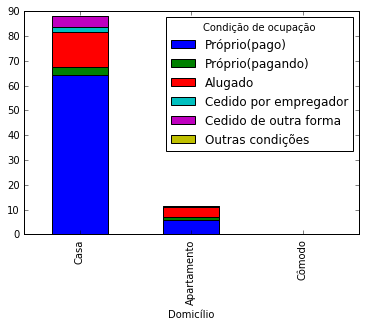

In [14]:
plot = c22.plot(kind="bar", stacked=True)

In [111]:
c3 = pd.crosstab(dados["Condição de ocupação"], dados["Quantidade de Cômodos"]) #Cômodos[quant_comodos] #[Cômodos])
c3

Quantidade de Cômodos,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
Condição de ocupação,,,,,,,,,,,,,,,,,,,,,
Próprio(pago),982,3704,9839,21385,16185,10045,6063,3138,1981,911,...,21,25,6,12,5,2,4,2,1,2
Próprio(pagando),25,143,533,1763,920,647,341,180,100,63,...,0,1,1,1,0,0,0,0,0,0
Alugado,673,2236,3876,5625,3186,1556,815,368,195,77,...,1,1,1,0,0,1,0,0,0,0
Cedido por empregador,41,122,302,716,461,249,113,37,24,7,...,0,1,0,0,0,0,1,0,0,0
Cedido de outra forma,163,601,1173,1704,880,401,217,83,46,23,...,0,0,1,0,0,0,0,0,0,0
Outras condições,20,49,90,166,91,46,17,9,4,5,...,0,0,0,0,0,0,0,0,0,0


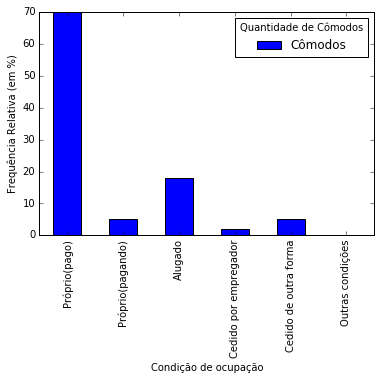

In [16]:
c33 = (c3/c3.sum().sum()*100).round(decimals=0)
plot = c33.plot(kind='bar')
plt.ylabel('Frequência Relativa (em %)')

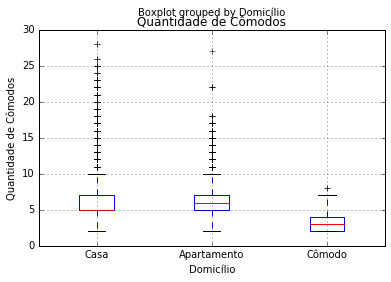

In [140]:
dados.boxplot(column='Quantidade de Cômodos', by="Domicílio")
plt.ylabel("Quantidade de Cômodos")
plt.xlabel("Domicílio")

In [156]:
c4=pd.crosstab(dados["Domicílio"],dados["Material predominante das paredes do domicílio"],normalize=(True))
print('Tabela Cruzada por total GERAL (em %):')
c44=c4*100
c44

Tabela Cruzada por total GERAL (em %):


Material predominante das paredes do domicílio,Alvenaria,Madeira aparelhada,Taipa não revestida,Madeira aproveitada,Palha,Outro material
Domicílio,,,,,,
Casa,80.065646,6.815418,0.596934,0.349487,0.027211,0.168366
Apartamento,11.615547,0.046768,0.000000,0.000000,0.000000,0.005952
Cômodo,0.244896,0.046768,0.001701,0.012755,0.000850,0.001701


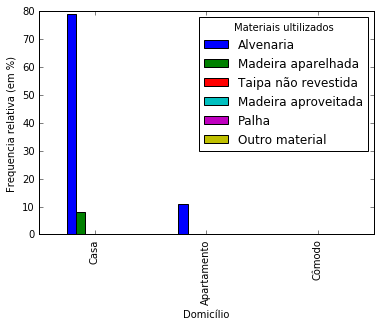

In [76]:
c4 = pd.crosstab(dados["Domicílio"],dados["Material predominante das paredes do domicílio"], rownames=["Domicílio"], colnames=["Materiais ultilizados"])
c4 = (c4/len(dados)*100).round(decimals=0)
plot = c4.plot(kind='bar')
plt.ylabel("Frequencia relativa (em %)")

In [158]:
c5=pd.crosstab(dados["Domicílio"],dados["Material predominante na cobertura do domicílio"],normalize=(True))
print('Tabela Cruzada por total GERAL (em %):')
c55=c5*100
c55

Tabela Cruzada por total GERAL (em %):


Material predominante na cobertura do domicílio,Telha,Laje de concreto,Madeira aparelhada,Zinco,Madeira aproveitada,Palha,Outro material
Domicílio,,,,,,,
Casa,71.59718,14.129132,0.276358,1.376689,0.026360,0.297617,0.319725
Apartamento,1.83927,9.756720,0.009354,0.042517,0.000850,0.000000,0.019558
Cômodo,0.22959,0.054421,0.003401,0.006803,0.001701,0.010204,0.002551


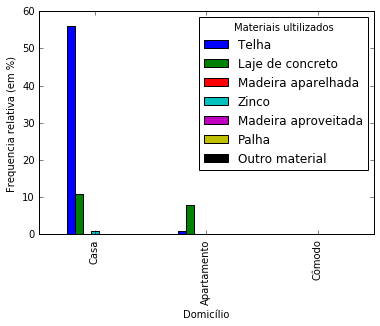

In [159]:
c5 = pd.crosstab(dados["Domicílio"],dados["Material predominante na cobertura do domicílio"], rownames=["Domicílio"], colnames=["Materiais ultilizados"])
c5 = (c5/len(dados)*100).round(decimals=0)
plot = c5.plot(kind='bar')
plt.ylabel("Frequencia relativa (em %)")

In [ ]:
#DADOS DE 2011

In [141]:
#Tabela cruzada de domicílios com sua condição de ocupação de 2011

c21=pd.crosstab(dados2["2Domicílio"],dados2["2Condição de ocupação"],normalize=(True))
print('Tabela Cruzada por total GERAL (em %):')
c221=c21*100
c221

Tabela Cruzada por total GERAL (em %):


2Condição de ocupação,Próprio(pago),Próprio(pagando),Alugado,Cedido por empregador,Cedido de outra forma,Outras condições
2Domicílio,,,,,,
Casa,65.081086,2.938805,13.267628,1.886928,4.797061,0.453364
Apartamento,5.727085,1.376221,3.515814,0.098557,0.358391,0.032255
Cômodo,0.113789,0.003584,0.250874,0.012544,0.069886,0.016128


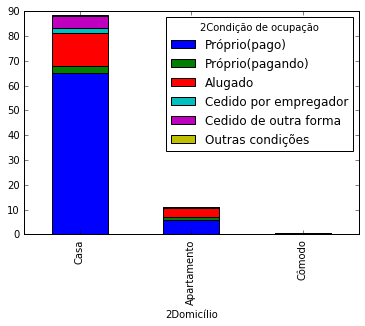

In [142]:
plot = c221.plot(kind="bar", stacked=True)

In [143]:
c3 = pd.crosstab(dados2["2Condição de ocupação"], dados2["2Quantidade de Cômodos"])
c3

2Quantidade de Cômodos,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
2Condição de ocupação,,,,,,,,,,,,,,,,,,,,,
Próprio(pago),290,1414,4265,10679,21963,16533,10175,6109,3158,1991,...,21,25,6,12,5,2,4,2,1,2
Próprio(pagando),3,27,146,540,1768,924,648,341,180,100,...,0,1,1,1,0,0,0,0,0,0
Alugado,111,741,2276,3918,5644,3198,1558,817,370,195,...,1,1,1,0,0,1,0,0,0,0
Cedido por empregador,6,57,153,345,730,476,258,116,39,24,...,0,1,0,0,0,0,1,0,0,0
Cedido de outra forma,97,266,708,1281,1763,909,411,219,83,46,...,0,0,1,0,0,0,0,0,0,0
Outras condições,17,33,53,103,176,92,47,17,9,4,...,0,0,0,0,0,0,0,0,0,0


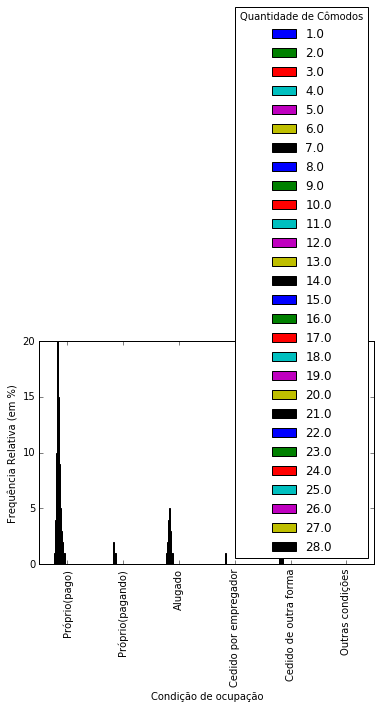

In [99]:
c33 = (c3/c3.sum().sum()*100).round(decimals=0)
plot = c33.plot(kind='bar')
plt.ylabel('Frequência Relativa (em %)')

In [169]:
domi = dados2["2Domicílio"]
dados.boxplot(column="dados2['2Quantidade de Cômodos']", by='domi')
plt.ylabel("Quantidade de Cômodos")
plt.xlabel("Domicílio")

KeyError: 'domi'

In [162]:
c4=pd.crosstab(dados2["2Domicílio"],dados2["2Material predominante das paredes do domicílio"],normalize=(True))
print('Tabela Cruzada por total GERAL (em %):')
c44=c4*100
c44

Tabela Cruzada por total GERAL (em %):


2Material predominante das paredes do domicílio,Alvenaria,Madeira aparelhada,Taipa não revestida,Madeira aproveitada,Palha,Outro material
2Domicílio,,,,,,
Casa,78.487591,8.267180,0.897769,0.517875,0.026879,0.227578
Apartamento,11.050981,0.054655,0.000000,0.000000,0.000000,0.002688
Cômodo,0.391542,0.043007,0.009856,0.017920,0.001792,0.002688


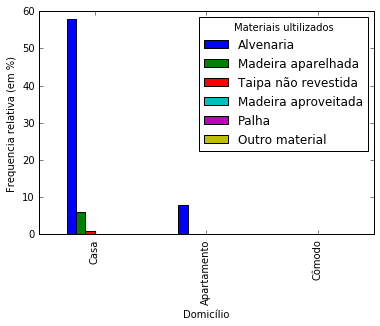

In [163]:
c4 = pd.crosstab(dados2["2Domicílio"],dados2["2Material predominante das paredes do domicílio"], rownames=["Domicílio"], colnames=["Materiais ultilizados"])
c4 = (c4/len(dados)*100).round(decimals=0)
plot = c4.plot(kind='bar')
plt.ylabel("Frequencia relativa (em %)")

In [164]:
c5=pd.crosstab(dados2["2Domicílio"],dados2["2Material predominante na cobertura do domicílio"],normalize=(True))
print('Tabela Cruzada por total GERAL (em %):')
c55=c5*100
c55

Tabela Cruzada por total GERAL (em %):


2Material predominante na cobertura do domicílio,Telha,Laje de concreto,Madeira aparelhada,Zinco,Madeira aproveitada,Palha,Outro material
2Domicílio,,,,,,,
Casa,72.773945,13.000627,0.157692,1.543768,0.034047,0.505331,0.409462
Apartamento,1.916495,9.107607,0.014336,0.059134,0.000000,0.000000,0.010752
Cômodo,0.370039,0.068990,0.004480,0.015232,0.000000,0.004480,0.003584


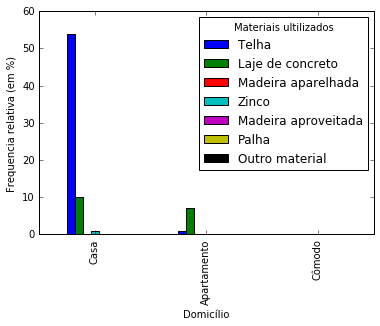

In [165]:
c5 = pd.crosstab(dados2["2Domicílio"],dados2["2Material predominante na cobertura do domicílio"], rownames=["Domicílio"], colnames=["Materiais ultilizados"])
c5 = (c5/len(dados)*100).round(decimals=0)
plot = c5.plot(kind='bar')
plt.ylabel("Frequencia relativa (em %)")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

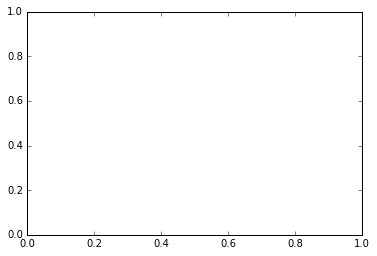

In [171]:
dados.boxplot(column = "Material predominante das paredes do domicílio", by = 'Quantidade de Cômodos')

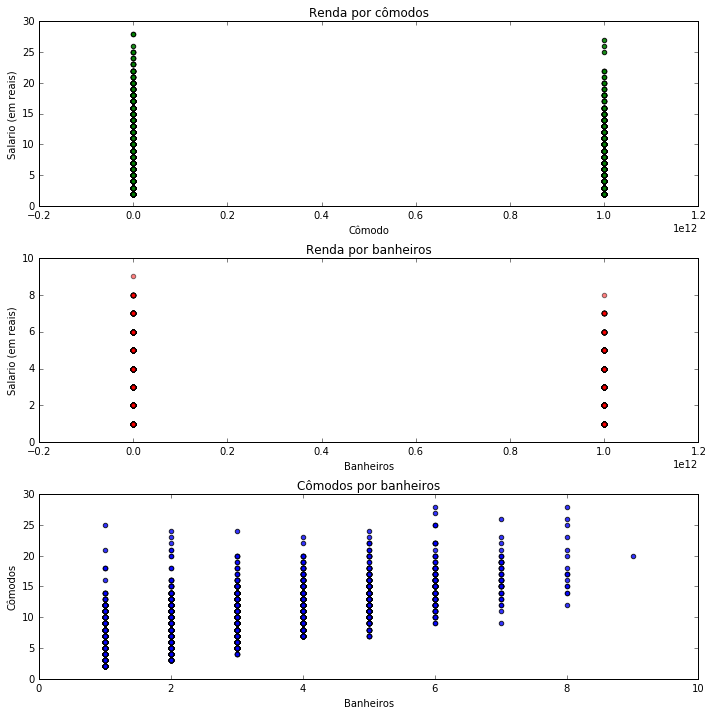

In [78]:
matriz = plt.figure(figsize=(10,10))

plt.subplot(311)
plt.scatter(dados["Rendimento mensal"], dados["Quantidade de Cômodos"], c="g", alpha=0.9)
plt.title("Renda por cômodos")
plt.xlabel("Cômodo")
plt.ylabel("Salario (em reais)")

plt.subplot(312)
plt.scatter(dados["Rendimento mensal"], dados["Quantidade de banheiros"], c="r", alpha=0.5)
plt.title("Renda por banheiros")
plt.xlabel("Banheiros")
plt.ylabel("Salario (em reais)")

plt.subplot(313)
plt.scatter(dados["Quantidade de banheiros"], dados["Quantidade de Cômodos"], c="b", alpha=0.8)
plt.title("Cômodos por banheiros")
plt.xlabel("Banheiros")
plt.ylabel("Cômodos")

plt.tight_layout()
plt.show()

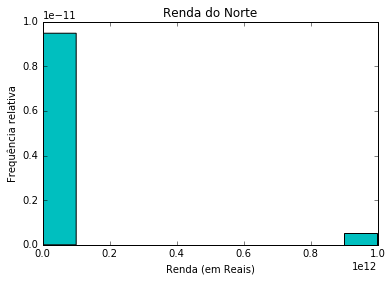

In [68]:
#faixa = arange(0,6000,200)

plot = renda_norte.plot.hist(bins=10, normed=1, color="c")
plt.title("Renda do Norte")
plt.xlabel("Renda (em Reais)")
plt.ylabel("Frequência relativa")
plt.show()

___
## Conclusão 

Descreva aqui suas conclusões!